In [1]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the datasets
customers = pd.read_csv(r"C:\Users\ziniy\Downloads\Customers.csv")
products = pd.read_csv(r"C:\Users\ziniy\Downloads\Products.csv")
transactions = pd.read_csv(r"C:\Users\ziniy\Downloads\Transactions.csv")

# Inspect datasets
print(customers.info())
print(products.info())
print(transactions.info())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Merge datasets for a comprehensive view
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

Davies-Bouldin Index: 0.7212797181816302
Silhouette Score: 0.4497501059000638


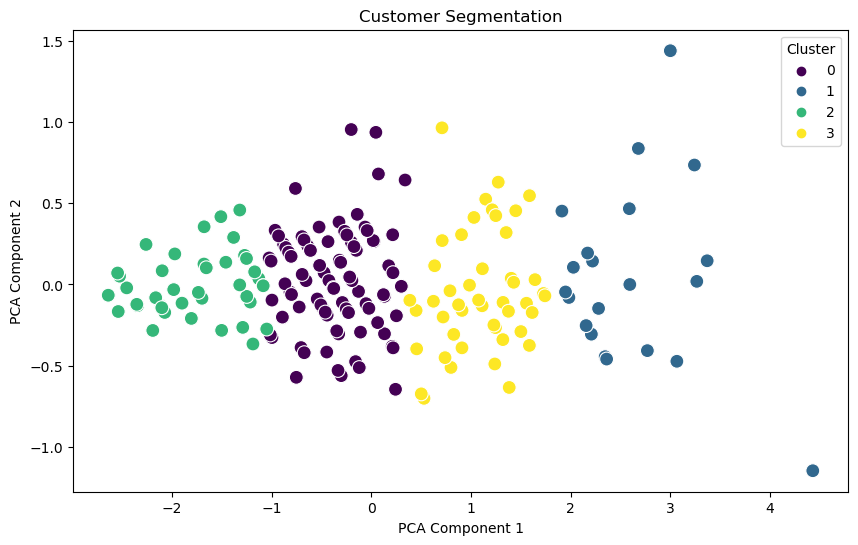

In [3]:
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler

# Suppress warnings (including FutureWarnings and UserWarnings)
warnings.filterwarnings("ignore")

# Set environment variable to avoid MKL memory leak on Windows
os.environ["OMP_NUM_THREADS"] = "1"

# Assuming `data` is already loaded and preprocessed
# Feature engineering for clustering
customer_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': 'nunique'
}).reset_index()

# Normalize features
scaler = StandardScaler()
features = scaler.fit_transform(customer_data.iloc[:, 1:])

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)  # Explicit n_init to avoid warning
customer_data['Cluster'] = kmeans.fit_predict(features)

# Evaluate clustering
db_index = davies_bouldin_score(features, customer_data['Cluster'])
silhouette_avg = silhouette_score(features, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features)

# Plot the PCA-reduced clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_features[:, 0], y=pca_features[:, 1],
    hue=customer_data['Cluster'], palette='viridis', s=100
)
plt.title('Customer Segmentation')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
